In [1]:
import pandas as pd

In [9]:
negative_df = pd.read_csv('negative.csv', names=['id', 'tdate', 'tmane', 'ttext', 'ttype', 'trep', 'trtv', 'tfav', 'tstcount', 'tfol', 'fien', 'listcount'], delimiter=';')
positive_df = pd.read_csv('positive.csv', names=['id', 'tdate', 'tmane', 'ttext', 'ttype', 'trep', 'trtv', 'tfav', 'tstcount', 'tfol', 'fien', 'listcount'], delimiter=';')

In [10]:
negative_df.head()

,id,tdate,tmane,ttext,ttype,trep,trtv,tfav,tstcount,tfol,fien,listcount
0,408906762813579264,1386325944,dugarchikbellko,на работе был полный пиддес :| и так каждое за...,-1,0,0,0,8064,111,94,2
1,408906818262687744,1386325957,nugemycejela,"Коллеги сидят рубятся в Urban terror, а я из-з...",-1,0,0,0,26,42,39,0
2,408906858515398656,1386325966,4post21,@elina_4post как говорят обещаного три года жд...,-1,0,0,0,718,49,249,0
3,408906914437685248,1386325980,Poliwake,"Желаю хорошего полёта и удачной посадки,я буду...",-1,0,0,0,10628,207,200,0
4,408906914723295232,1386325980,capyvixowe,"Обновил за каким-то лешим surf, теперь не рабо...",-1,0,0,0,35,17,34,0


In [11]:
positive_df.head()

,id,tdate,tmane,ttext,ttype,trep,trtv,tfav,tstcount,tfol,fien,listcount
0,408906692374446080,1386325927,pleease_shut_up,"@first_timee хоть я и школота, но поверь, у на...",1,0,0,0,7569,62,61,0
1,408906692693221377,1386325927,alinakirpicheva,"Да, все-таки он немного похож на него. Но мой ...",1,0,0,0,11825,59,31,2
2,408906695083954177,1386325927,EvgeshaRe,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,1,0,1,0,1273,26,27,0
3,408906695356973056,1386325927,ikonnikova_21,"RT @digger2912: ""Кто то в углу сидит и погибае...",1,0,1,0,1549,19,17,0
4,408906761416867842,1386325943,JumpyAlex,@irina_dyshkant Вот что значит страшилка :D\nН...,1,0,0,0,597,16,23,1


2.	Вычислить сколько в среднем было ретвитов у позитивных и негативных  сообщений

In [12]:
negative_df['trtv'].mean()

2.0420199601511753

In [13]:
positive_df['trtv'].mean()

4.166494069323216

In [55]:
print(negative_df.groupby('tmane')['ttext'].count())
negative_df.groupby('tmane')['ttext'].count().describe()

tmane
00000Angelina00    2
0001377715         1
000Anyuta000       2
000bred            1
000netmeni         1
                  ..
zzzleshazzz        1
zzzmortem          2
zzzyroc            2
zzzz257            1
zzzzz245           1
Name: ttext, Length: 80758, dtype: int64


count    80758.000000
mean         1.385906
std          1.158054
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         52.000000
Name: id, dtype: float64

3.	Вычислить количество слов предложений в каждом сообщении используя регулярные выражения: выделить в сообщении предложения, слова (токенизация), вычислить количество слов  

In [34]:
import re

In [57]:
x = negative_df['ttext'][0] + '.'

In [60]:
len(re.findall('\.', x))

1

In [106]:
#кол-во предложений в каждом тексте
negative_df['ttext'].apply(lambda x: len(re.findall('[\.\!\?]\ ', x)) + 1).head()    

0    1
1    1
2    1
3    1
4    1
Name: ttext, dtype: int64

In [108]:
positive_df['ttext'].apply(lambda x: len(re.findall('[\.\!\?]\ ', x)) + 1).head()   

0    1
1    2
2    1
3    1
4    1
Name: ttext, dtype: int64

In [109]:
#Кол-во слов в предложении
negative_df['ttext'].apply(lambda x: len(re.findall('\ ', x))).head()    

0    15
1    13
2     6
3    10
4     9
Name: ttext, dtype: int64

In [110]:
positive_df['ttext'].apply(lambda x: len(re.findall('\ ', x))).head()    

0    16
1    12
2     8
3    25
4    15
Name: ttext, dtype: int64

4.	Выполнить токенизацию с использованием библиотеки NLTK 

In [115]:
from nltk.tokenize import word_tokenize
import string
translate_table = dict((ord(char), '') for char in string.punctuation)

In [119]:
negative_df['ttext'].apply(lambda x: word_tokenize(x.lower().translate(translate_table)))

0         [на, работе, был, полный, пиддес, и, так, кажд...
1         [коллеги, сидят, рубятся, в, urban, terror, а,...
2         [elina4post, как, говорят, обещаного, три, год...
3         [желаю, хорошего, полёта, и, удачной, посадкия...
4         [обновил, за, какимто, лешим, surf, теперь, не...
                                ...                        
111918    [но, не, каждый, хочет, что, то, исправлять, h...
111919    [скучаю, так, только, taaannyaaa, вправляет, м...
111920    [вот, и, в, школу, в, говно, это, идти, уже, н...
111921    [rt, them, lisaberoud, тауриэль, не, грусти, о...
111922    [такси, везет, меня, на, работу, раздумываю, п...
Name: ttext, Length: 111923, dtype: object

In [118]:
negative_df['tokens'] = negative_df['ttext'].apply(lambda x: word_tokenize(x.lower().translate(translate_table)))

In [120]:
positive_df['tokens'] = positive_df['ttext'].apply(lambda x: word_tokenize(x.lower().translate(translate_table)))

5.	Привести слова к нормальной форме с использованием библиотеки pymorphy2 / pymystem3

In [121]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [139]:
%%time
def lemmatize(lst):
    return [morph.parse(i)[0].normal_form for i in lst]
negative_tokens = negative_df.head(1000)['tokens'].apply(lemmatize)
positive_tokens = positive_df.head(1000)['tokens'].apply(lemmatize)

Wall time: 5.23 s


In [135]:
import pymystem3

In [138]:
from pymystem3 import Mystem

m = Mystem()
positive_df.head(100)['ttext'].apply(lambda x: m.lemmatize(x.lower().translate(translate_table)))

0     [firsttimee,  , хоть,  , я,  , и,  , школоть, ...
1     [да,  , всетака,  , он,  , немного,  , похожий...
2     [rt,  , katiacheh,  , ну,  , ты,  , идиотка,  ...
3     [rt,  , digger2912,  , кто,  , то,  , в,  , уг...
4     [irinadyshkant,  , вот,  , что,  , значить,  ,...
                            ...                        
95    [arinalen,   , ахи,  , тут,  , еще,  , у,  , о...
96    [палец,  , совсем,  , отвыкать,  , от,  , гита...
97    [в,  , 5,  , класс,  , быть,  , учиться,  , на...
98    [ , ты,  , весь,  , время,  , работать,   , не...
99    [romashkamarinka,  , maksimofficial,  , ясно, ...
Name: ttext, Length: 100, dtype: object

6.	Найти 10 самых частотных слов в положительном и негативном корпусах используя библиотеку NLTK.

In [149]:
fdist_neg = nltk.FreqDist(negative_tokens.sum())
fdist_neg.most_common(10)

[('я', 511),
 ('не', 387),
 ('и', 282),
 ('в', 236),
 ('а', 175),
 ('что', 168),
 ('на', 159),
 ('rt', 131),
 ('быть', 124),
 ('так', 118)]

In [150]:
fdist_pos = nltk.FreqDist(positive_tokens.sum())
fdist_pos.most_common(10)

[('я', 334),
 ('в', 292),
 ('и', 265),
 ('не', 242),
 ('на', 186),
 ('rt', 163),
 ('с', 143),
 ('что', 138),
 ('ты', 128),
 ('быть', 124)]

7.	Построить гистограмму распределения частот слов в позитивном и негативном корпусах 

(array([3.912e+03, 4.500e+01, 1.600e+01, 1.100e+01, 3.000e+00, 0.000e+00,
        3.000e+00, 4.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  1.    ,  16.9375,  32.875 ,  48.8125,  64.75  ,  80.6875,
         96.625 , 112.5625, 128.5   , 144.4375, 160.375 , 176.3125,
        192.25  , 208.1875, 224.125 , 240.0625, 256.    , 271.9375,
        287.875 , 303.8125, 319.75  , 335.6875, 351.625 , 367.5625,
        383.5   , 399.4375, 415.375 , 431.3125, 447.25  , 463.1875,
        479.125 , 495.0625, 511.    ]),
 <BarContainer object of 32 artists>)

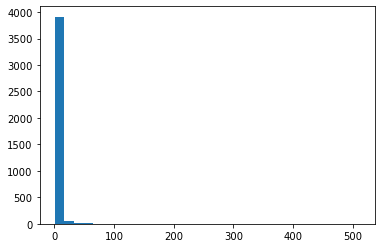

In [153]:
from matplotlib import pyplot as plt

plt.hist(fdist_neg.values(), bins='rice')

(array([4.619e+03, 4.700e+01, 2.000e+01, 1.400e+01, 8.000e+00, 6.000e+00,
        1.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  1.        ,  10.79411765,  20.58823529,  30.38235294,
         40.17647059,  49.97058824,  59.76470588,  69.55882353,
         79.35294118,  89.14705882,  98.94117647, 108.73529412,
        118.52941176, 128.32352941, 138.11764706, 147.91176471,
        157.70588235, 167.5       , 177.29411765, 187.08823529,
        196.88235294, 206.67647059, 216.47058824, 226.26470588,
        236.05882353, 245.85294118, 255.64705882, 265.44117647,
        275.23529412, 285.02941176, 294.82352941, 304.61764706,
        314.41176471, 324.20588235, 334.        ]),
 <BarContain

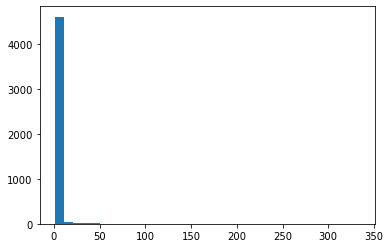

In [154]:
plt.hist(fdist_pos.values(), bins='rice')